<img src="https://whatcar.vn/media/2018/09/car-lot-940x470.jpg"/>

Прогнозирование стоимости автомобиля по характеристикам
====================================================

*Это -- **продолжение ML проекта** от [SkillFactory DST](https://github.com/gravek/Skillfactory/tree/master/project_5), дополненного здесь дугими ML и **DL** моделями*

### Лучшие значения метрик:
> MAPE   **9.88**  
> SCORE **10.95** (30-е место)



### Цель данного учебного Data Science проекта
 * посторить модели машинного и глубокого обучения на реальных данных
 * достичь наилучших показателей по метрикe качества модели



## Что сделано

### Анализ датасета

> **Отличия от датасета для предыдущей ML работы:**
> * меньшая неоднородность данных: присутствуют только премиальные марки автомобилей (BMW, Audi и т.п.)
> * датасет довольно чистый: почти без пропусков и некорректно введенных или испорченных данных

> **Отличия от датасета для предыдущей ML работы:**
> * Количественные признаки не имеют нормального распределения
> * Но и выбросы незначительны


### Предобработка

> **Отбор колонок**
> * исключены признаки, несущее информацию, имеющуюся в других признаках (количество дверей корелирует с типом кузова, к тому же, оно может быть неверно указано владельцем)



> **Очистка и коррекция данных**
> * некоторые текстовые признаки, содержащие числовую информацию, очищены и преобразованиы в числовые
> * обнаружен ризнак с подвохом ("Владельцы"), в котором преобразования не выполнялись из-за невидимых символов 
> * пустоты в данных заполнены или удалены  
> * лемматизация много-текстового признака (для сетей)



> **Создание и преобразование признаков**
> * год изобретения модели --> в возраст модели
> * год выпуска автомобиля --> в возраст автомобиля
> * интенсивность эксплуатации машины (пробег/возраст)
> * модели автомобилей с дорогими параметрами, особо влияющими на цену



### Использованы модели:
> **ML**
> * CatBoostRegressor -- хороший результат с параметрами "из коробки"
> * CatBoost Cross Validation -- лучший результат без блендинга
> * LGBMRegressor -- схожий результат с CatBoostRegressor

> **DL**
> * Простая модель Tabular NN
> * NLP & MLP (Multiple Inputs) -- сделана лемматизация текста объявлений, настроены параметры callbacks
> * NLP(SBERT) & MLP (Multiple Inputs) -- применена предобученная модель `sbert_large_nlu_ru`
> * ComputerVision & NLP & MLP (Multiple Inputs) -- настроена аугментация и параметры callbacks


> **Наиболее важные признаки для CatBoost:**
> * возраст автомобиля
> * возраст модели
> * мощность двигателя
> * пробег
> * объём двигателя

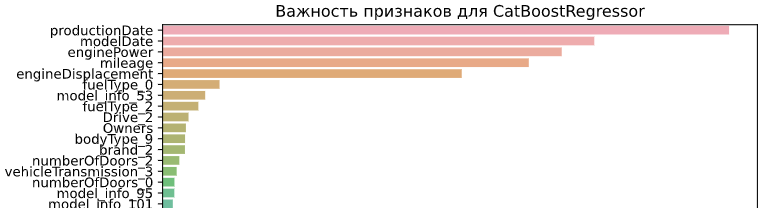


### Метрики при валидации:
| Что сделано | MAPE | Score |
| :- | :-: | :-: |
| Наивная модель (средняя цена по главным признакам) | 19.88 | - |
|  |  |  |
| CatBoostRegressor с базовой обработкой признаков | 13.06 | - |
| CatBoostRegressor с числовыми двигателями и л.с. | 11.97 | - |
| CatBoostRegressor с датами, превращенными в возраст и RobustScaler | 11.97 | - |
| CatBoostRegressor с RobustScaler | 11.97 | - |
| CatBoostRegressor с признаком 'xDrive' | 12.59 | - |
| CatBoostRegressor с логарифмированным таргетом | **11.02** | 12.09 |
| Сatboost_CV | **10.67** | - |
| LGBM | 11.24 | - |
| Сatboost + LGBM  (blend prediction) | 10.89 | - |
|  |  |  |
| Tabular базовый | 11.64 | - |
| Tabular с обработкой | 11.27 | - |
| Tabular + LGBM (blend prediction) | **10.65** | - |
|  |  |  |
| NLP & MLP (Multiple Inputs) базовый | 11.60 | 11.93 |
| NLP & MLP с RobustScaler + лемматизация | 11.13 | - |
| NLP & MLP + Сatboost_CV  (blend prediction) | 10.25 | 11.13 |
| NLP & MLP + CatBoostRegressor + Сatboost_CV  (blend) | 10.25 | 11.27 |
| SBERT & MLP + Сatboost_CV  (blend prediction) test_size=0.15  | **9.88** | 10.98 |
| SBERT & MLP + Сatboost_CV  (blend prediction) test_size=0.30 | 10.75 | **10.95** |
|  |  |  |
| ComputerVision & NLP & MLP (Multiple Inputs) | 11.60 | - |
| ComputerVision & NLP & MLP  +  Сatboost_CV  (blend prediction) | 10.37 | 11.37 |
| ComputerVision & NLP & MLP  +  CatBoostRegressor  +  Сatboost_CV  (blend) | 10.25 | 11.27 |

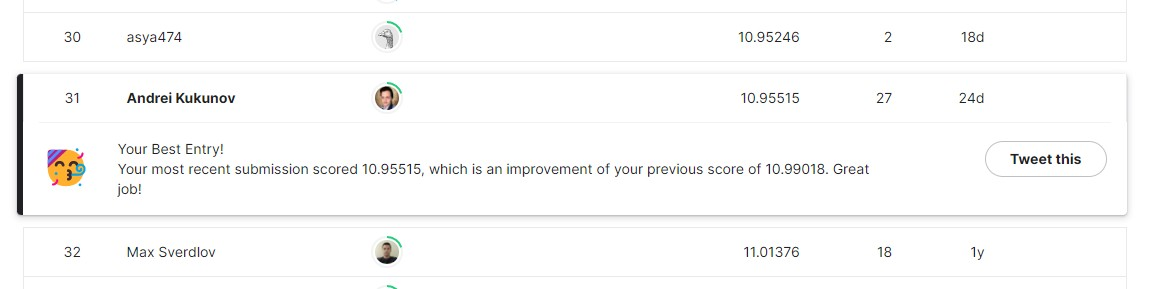


-----------------------------------------------------------------


## Выводы
> **Наиболее полезным для предсказания оказалось:** 
> * отбор признаков
> * очистка и обработка признаков
> * логорифмизация таргета (логарифмизация признаков не улучшила результат)
> * использование предобученной "смысловой" модели NLP
> * блендинг предсказаний от моделей разной природы

> **Как еще улучшить результат:**
> * сделать проброс важных признаков
> * применить более специфические модели для обработки фотографий

-----------------------------------------------------------------

## Содержание:

- [Setup&Load](#setup-load)
- [DATA](#data)
  * [Model 0, "наивная"](#model-0-----------)
- [EDA](#eda)
- [PreProc Tabular Data](#preproc-tabular-data)
  * [Split data](#split-data)
- [ML](#ml)
  * [CatBoostRegressor](#catboostregressor)
  * [CatBoost CV](#catboost-cv)
  * [LGBM](#lgbm)
- [DL](#dl)
  * [Simple Dense NN](#simple-dense-nn)
  * [NLP + Multiple Inputs](#nlp---multiple-inputs)
    + [Лемматизация, Токенизация](#-------------------------)
    + [Построение модели](#-----------------)
  * [Transformers + MLP](#transformers---mlp)
  * [Blend CatBoost + nn2](#blend-catboost---nn2)
  * [NLP + ComputerVision](#nlp---computervision)
- [Blend ALL](#blend-all)


-----------------------------------------------------------------

# Setup&Load
В baseline мы сделаем следующее:
* Построим "наивную"/baseline модель, предсказывающую цену по модели и году выпуска (с ней будем сравнивать другие модели)
* Обработаем и отнормируем признаки
* Сделаем первую модель на основе градиентного бустинга с помощью CatBoost
* Сделаем вторую модель на основе нейронных сетей и сравним результаты
* Сделаем multi-input нейронную сеть для анализа табличных данных и текста одновременно
* Добавим в multi-input сеть обработку изображений
* Осуществим ансамблирование градиентного бустинга и нейронной сети (усреднение их предсказаний)

In [1]:
!pip install -q tensorflow==2.3
!pip install pymorphy2
!pip install pymorphy2-dicts
!pip install catboost==1.0.6

In [2]:
#аугментации изображений
!pip install albumentations -q

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import random
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#Настройки pandas
pd.options.display.max_rows = 50
#pd.options.display.max_columns = 500
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 200

import os
import sys
import PIL
import cv2
import re
import pymorphy2

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

%pip install catboost==1.0.6

from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# # keras
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import albumentations



# plt
import matplotlib.pyplot as plt
import seaborn as sns
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
%matplotlib inline

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
# Catboost оптимальная версия -- 1.0.6
#import catboost
#print('Catboost   :', catboost.__version__)

In [5]:
print('Python       :', sys.version.split('\n')[0])
print('Numpy        :', np.__version__)
print('Tensorflow   :', tf.__version__)
#print('Catboost     :', catboost.__version__)

In [6]:
# Метрика, которая пригодится
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

In [7]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [8]:
#!pip freeze > requirements.txt

# DATA

Посмотрим на типы признаков:

* bodyType - категориальный
* brand - категориальный
* color - категориальный
* description - текстовый
* engineDisplacement - числовой, представленный как текст, **сделать числовым**
* enginePower - числовой, представленный как текст, **сделать числовым**
* fuelType - категориальный
* mileage - числовой
* modelDate - числовой
* model_info - категориальный, **сократить размерность**
* name - категориальный, желательно сократить размерность
* numberOfDoors - категориальный
* price - числовой, целевой
* productionDate - числовой
* sell_id - изображение (файл доступен по адресу, основанному на sell_id)
* vehicleConfiguration - не используется (комбинация других столбцов)
* vehicleTransmission - категориальный
* Владельцы - категориальный, **сделать числовым**
* Владение - числовой, представленный как текст
* ПТС - категориальный
* Привод - категориальный
* Руль - категориальный

In [9]:
DATA_DIR = '../input/sf-dst-car-price-prediction-part2/'
train = pd.read_csv(DATA_DIR + 'train.csv')
test = pd.read_csv(DATA_DIR + 'test.csv')
sample_submission = pd.read_csv(DATA_DIR + 'sample_submission.csv')

In [10]:
train.info()

In [11]:
train.nunique()

## Model 0: "наивная"
Эта модель будет предсказывать среднюю цену по модели и году выпуска. 
C ней будем сравнивать другие модели.



In [12]:
# split данных
data_train, data_test = train_test_split(train, test_size=0.15, shuffle=True, random_state=RANDOM_SEED)

In [13]:
# Наивная модель -- просто предсказываем медианное значение

predicts = []
for index, row in pd.DataFrame(data_test[['model_info', 'productionDate']]).iterrows():
    query = f"model_info == '{row[0]}' and productionDate == '{row[1]}'"
    predicts.append(data_train.query(query)['price'].median())

# заполним не найденные совпадения
predicts = pd.DataFrame(predicts)
predicts = predicts.fillna(predicts.median())

# округлим
predicts = (predicts // 1000) * 1000

#оцениваем точность
print(f"Точность наивной модели по метрике MAPE: {(mape(data_test['price'], predicts.values[:, 0]))*100:0.2f}%")

# EDA

### Распределим признаки по группам

In [14]:
#Приведем все столбцы к латинице (и нижнему регистру):
dict_col_names = {'Владельцы': 'Owners', 'Привод': 'Drive', 'Владение': 'Ownership', 'ПТС': 'Tech_passport', 'Руль': 'Wheel'}
for data in [train, test]:
    data.rename(dict_col_names, axis=1, inplace=True)
    #data.columns = data.columns.str.lower()

In [15]:
## ДЛЯ БАЗОВОГО ВАРИАНТА
#используем все текстовые признаки как категориальные без предобработки
#categorical_features = ['bodyType', 'brand', 'color', 'engineDisplacement', 'enginePower', 'fuelType', 'model_info', 'name',
#  'numberOfDoors', 'vehicleTransmission', 'Owners', 'Ownership', 'Tech_passport', 'Drive', 'Wheel']

## используем все числовые признаки
#numerical_features = ['mileage', 'modelDate', 'productionDate']

In [16]:
# ДЛЯ МАСТЕР-ВАРИАНТА -- собираем только то, что нам нужно

# категориальные признаки
categorical_features = ['bodyType', 'brand', 'color', 'fuelType', 'model_info',
  'numberOfDoors', 'vehicleTransmission', 'Tech_passport', 'Drive']

# числовые признаки
numerical_features = ['mileage', 'modelDate', 'productionDate', 'engineDisplacement', 'enginePower', 'Owners'] # , 'miles_per_year'


# Оделим признаки для обработки сетями (на всякий случай)
neural_features = ['description', 'sell_id']

### Числовые признаки

In [17]:
# Посмотрим на объем двигателя: необходимо убрать лишние символы, чтобы сделать признак числовым (так он будет более информативен)
train.engineDisplacement.unique() # .value_counts() 

In [18]:
# Заполним неопределенность 'undefined LTR' модой (для последюущего преобразования)
#train.engineDisplacement[train.engineDisplacement == 'undefined LTR'] = '2.0 LTR'
#train.engineDisplacement.unique()

In [19]:
# Видим, что есть пропуски во владении, когда один владелец. Можно заполнить.
train[train.Ownership.isna()].Owners.value_counts()

In [20]:
# Признак с подвохом

print('Преобразование некорректно:\n', train.Owners.replace(to_replace={'1 владелец':1.0, '2 владельца':2.0, '3 или более':3.0}).value_counts(), '\n')

train.Owners = train.Owners.replace(to_replace={'1\xa0владелец':1.0, '2\xa0владельца':2.0, '3 или более':3.0})
test.Owners = test.Owners.replace(to_replace={'1\xa0владелец':1.0, '2\xa0владельца':2.0, '3 или более':3.0})

print('Преобразование корректно:\n', train.Owners.value_counts())

In [21]:
# Признак о времени владения слишком пустой (на 65%) ...
print(train.Ownership.isna().sum()/len(train))

# Пропуски есть везде. Не берем...
train[train.Ownership.isna()].Owners.value_counts()

In [22]:
# Делаем объем двигателя числовым, убирая ' LTR' и заменяем образовавшиеся Nan модой
train.engineDisplacement = pd.to_numeric(train.engineDisplacement.str.replace(' LTR', ''), errors='coerce').fillna(2.0)  #.unique()  # raise  coerce  value_counts
test.engineDisplacement = pd.to_numeric(test.engineDisplacement.str.replace(' LTR', ''), errors='coerce').fillna(2.0)  #.unique()  # raise  coerce  value_counts

train.engineDisplacement.unique(), test.engineDisplacement.unique()

In [23]:
# Делаем лошадиные силы числовыми, убирая ' N12'
test.enginePower = test.enginePower.apply(lambda x: float(x[:-4]))
train.enginePower = train.enginePower.apply(lambda x: float(x[:-4]))

train.enginePower.unique(), test.enginePower.unique()

In [24]:
# Добавляем интенсивность эксплуатации машины (пробег/возраст)
#test['miles_per_year'] = test['mileage'] // (test['productionDate'])
#train['miles_per_year'] = train['mileage'] // (train['productionDate'])

# Ухудшает метрики

In [25]:
train.info()

In [26]:
#посмотрим, как выглядят распределения числовых признаков
def visualize_distributions(titles_values_dict):
  columns = min(3, len(titles_values_dict))
  rows = (len(titles_values_dict) - 1) // columns + 1
  fig = plt.figure(figsize = (columns * 6, rows * 4))
  for i, (title, values) in enumerate(titles_values_dict.items()):
    hist, bins = np.histogram(values, bins = 20)
    ax = fig.add_subplot(rows, columns, i + 1)
    ax.bar(bins[:-1], hist, width = (bins[1] - bins[0]) * 0.7)
    ax.set_title(title)
  plt.show()

In [27]:
# ДЛЯ БАЗОВОГО ВАРИАНТА -- уже имеющиеся числовые признаки
# Проведем быстрый анализ данных для того, чтобы понимать, сможет ли с этими данными работать наш алгоритм.

visualize_distributions({
    'mileage': train['mileage'].dropna(),
    'modelDate': train['modelDate'].dropna(),
    'productionDate': train['productionDate'].dropna()
})

# CatBoost сможет работать с признаками и в таком виде, но для нейросети нужны нормированные данные.

In [28]:
# ДЛЯ ВСЕХ числовых признаков

viz_cols = {}
for col in numerical_features:
    viz_cols[col] = train[col].dropna()
    
visualize_distributions(viz_cols)

# PreProc Tabular Data

In [29]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
train['sample'] = 1 # помечаем где у нас трейн
test['sample'] = 0 # помечаем где у нас тест
test['price'] = 0 # в тесте у нас нет значения price, мы его должны предсказать, поэтому пока просто заполняем нулями

data = test.append(train, sort=False).reset_index(drop=True) # объединяем
print(train.shape, test.shape, data.shape)

In [30]:
# пропуски значений в процентах
#train[columns].isna().sum() / (len(train.index)/100) 
print(f'---------- TRAIN:---------- \n{train.isna().sum() / (len(train.index)/100)} , \n\n---------- TEST:---------- \n{test.isna().sum() / (len(test.index)/100)}') 

In [31]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    #df_output.drop(['description','sell_id',], axis = 1, inplace=True)
    
    # Или просто собираем сет из отмеченных признаков в группах колонок (кроме + neural_features)
    df_output = df_output[numerical_features + categorical_features + ['price', 'sample'] + ['name']]
    
    
    # ################### Numerical Features ############################################################## 
    # Далее заполняем пропуски
    for column in numerical_features:
        df_output[column].fillna(df_output[column].median(), inplace=True)


    
    # Превращаем год выпуска авто в его возраст
    df_output['productionDate'] = df_output['productionDate'].max() - df_output['productionDate']
    
    # Превращаем год изобретения модели в ее возраст
    df_output['modelDate'] = df_output['productionDate'].max() - df_output['modelDate']
    
 

    # Логарифмируем -- или не будем: страдает метрика сетей
    #for col in numerical_features:
    #    train[col] = np.log(train[col].max() - train[col])
    
        
 
    
    
    # ################### Categorical Features ############################################################## 
    # Label Encoding
    for column in categorical_features:
        df_output[column] = df_output[column].astype('category').cat.codes
        
    # One-Hot Encoding: в pandas есть готовая функция - get_dummies.
    df_output = pd.get_dummies(df_output, columns=categorical_features, dummy_na=False)

    
    
    # ################### Feature Engineering ####################################################
    # Выделим параметры моделей, особо влияющие на цену (предположительно)
    #df_output['name_xDrive'] = df_output['name'].apply(lambda x: 1 if 'xDrive' in x else 0)
    
    # Ухудшает все метрики 

    
    
    # Нормализация числовых признаков
    #scaler = MinMaxScaler()
    scaler = RobustScaler()
    for column in numerical_features:
        df_output[column] = scaler.fit_transform(df_output[[column]])[:,0]
        

    
    
    # ################### Clean #################################################### 
    # убираем временно добавленные признаки 
    df_output.drop(['name'], axis = 1, inplace=True)
    
    return df_output

In [32]:
# Запускаем и проверяем, что получилось
df_preproc = preproc_data(data)
df_preproc.sample(3)

In [33]:
df_preproc.info()

## Split data

In [34]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.price.values     # наш таргет
X = train_data.drop(['price'], axis=1)
X_sub = test_data.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=RANDOM_SEED) # test_size=0.15

In [44]:
test_data.info()

# ML

## CatBoostRegressor

In [45]:

# мой подбор
cbr_best_params = {'iterations': 6000,
                  'loss_function': 'RMSE',
                  'random_seed': 42,
                  'eval_metric': 'MAPE',
                  #'depth': 6,
                  #'l2_leaf_reg': 5,
                  'learning_rate': 0.1}


In [46]:
"""
# Базовый вариант
# bestTest = 0.1417759871
# bestIteration = 427

model = CatBoostRegressor(iterations = 5000,
                          #depth=10,
                          #learning_rate = 0.5,
                          random_seed = RANDOM_SEED,
                          eval_metric='MAPE',
                          custom_metric=['RMSE', 'MAE'],
                          od_wait=500,
                          #task_type='GPU',
                         )
model.fit(X_train, y_train,
         eval_set=(X_test, y_test),
         verbose_eval=100,
         use_best_model=True,
         #plot=True
         )
"""

In [47]:
"""
# Подбираем параметры

model = CatBoostRegressor(iterations = 6000, random_seed = RANDOM_SEED, eval_metric='MAPE')  # , silent=True

grid = {'learning_rate': [0.05, 0.1, 0.5], 'depth': [4, 6, 8], 'l2_leaf_reg': [3, 5, 7]}

randomized_search_result = model.randomized_search(grid, X_train, np.log(y_train), cv=5, plot=True)
"""

In [48]:
# Обучаем модель с выбранными параметрами

model = CatBoostRegressor(**cbr_best_params)

model.fit(X_train, np.log(y_train),
         eval_set=(X_test, np.log(y_test)),
         verbose_eval=300,
         use_best_model=True,
         plot=True
         )

In [49]:
model.get_params()

In [50]:
"""
# Базовый вариант -- TEST mape: 13.23%

test_predict_catboost = model.predict(X_test)
print(f"TEST mape: {(mape(y_test, test_predict_catboost))*100:0.2f}%")
"""

In [51]:
# Вариант базовый с подобранными параметрами                         -- TEST mape: 13.06%
# Вариант с числовыми двигателями и л.с. и без лишних признаков      -- TEST mape: 11.97%
# Вариант с логарифмироваными числовыми признаками                   -- TEST mape: 11.97%
# Вариант с датами, превращенными в возраст                          -- TEST mape: 11.97%
# Вариант с RobustScaler                                             -- TEST mape: 11.97%
# Вариант с признаком 'xDrive'                                       -- TEST mape: 12.59%  -- убираем
# Вариант с логарифмированным таргетом                               -- TEST mape: 11.02%
# Вариант с подбором параметров                                      -- TEST mape: 11.06%
# Вариант с 'early_stopping_rounds': 100                             -- TEST mape: 11.24%


test_predict_catboost = np.exp(model.predict(X_test))

# округлим
test_predict_catboost = (test_predict_catboost // 1000) * 1000

print(f"TEST mape: {(mape(y_test, test_predict_catboost))*100:0.2f}%")

In [52]:
#Посмотрим на важность признаков
FI = pd.DataFrame(zip(model.feature_names_, model.feature_importances_), columns=['Feature', 'Importance']).sort_values('Importance', ascending=False)[:40]
# Строим график относительного количества пропущенных значений:
fig, ax = plt.subplots(figsize = (8, 6))
bar_plot = sns.barplot(x='Importance', y='Feature', data=FI, alpha=0.8, ci=None)
plt.title('Важность признаков для CatBoostRegressor')
plt.ylabel('')
plt.show()

### Submission

In [53]:
# С логарифмизацией

sub_predict_catboost = np.exp(model.predict(X_sub))
sub_predict_catboost = (sub_predict_catboost // 1000) * 1000

sample_submission['price'] = sub_predict_catboost
sample_submission.to_csv('catboost_submission.csv', index=False)

In [54]:
# без логарифмизации
#sub_predict_catboost = model.predict(X_sub)
#sample_submission['price'] = sub_predict_catboost
#sample_submission.to_csv('catboost_submission.csv', index=False)

## CatBoost CV

In [55]:
from catboost import Pool, cv

cv_data = X_train
labels =  np.log(y_train)


cv_dataset = Pool(data=cv_data,label=labels)

"""
params = {"early_stopping_rounds": 100,
        "depth": 5,
        "loss_function": "Logloss",
#        'scale_pos_weight': classWeights,
        'auto_class_weights': 'Balanced', # SqrtBalanced  Balanced
        'eval_metric' :  'F1',
        "roc_file": "roc-file",
        "verbose": 0}
"""

cv_params = {'iterations': 6000,
             "early_stopping_rounds": 100,
             'loss_function': 'RMSE',
             'random_seed': 42,
             'eval_metric': 'MAPE',
              #'depth': 6,
              #'l2_leaf_reg': 5,
              'learning_rate': 0.1,
              #"verbose": 1,
             #'logging_level' : 'Verbose',
             'verbose_eval': 300
            }

cv_cb = cv(cv_dataset,
            cv_params,
            fold_count=5,
            return_models=True,
            #plot="True"
          )

In [56]:
#TEST mape: 10.67% -- усреднение предсказаний на всех фолдах

test_predict_cv_cb = np.exp(cv_cb[1][0].predict(X_test))

for mod in cv_cb[1]:
    test_predict_cv_cb = (test_predict_cv_cb + np.exp(mod.predict(X_test))) /2
    
# округлим
test_predict_cv_cb = (test_predict_cv_cb // 1000) * 1000

print(f"TEST mape: {(mape(y_test, test_predict_cv_cb))*100:0.2f}%")

In [57]:
'''
#Посмотрим на важность признаков
FI = pd.DataFrame(zip(cv_cb[1][4].feature_names_, cv_cb[1][4].feature_importances_), columns=['Feature', 'Importance']).sort_values('Importance', ascending=False)[:40]
# Строим график относительного количества пропущенных значений:
fig, ax = plt.subplots(figsize = (8, 6))
bar_plot = sns.barplot(x='Importance', y='Feature', data=FI, alpha=0.8, ci=None)
plt.title('Важность признаков для CatBoostRegressor')
plt.ylabel('')
plt.show()
'''

In [58]:
# Score: 11.77 -- усреднение предсказаний на всех фолдах (простой catboost Score: 11.92)

sub_predict_cv_cb = np.exp(cv_cb[1][0].predict(X_sub))

for mod in cv_cb[1]:
    sub_predict_cv_cb = (sub_predict_cv_cb + np.exp(mod.predict(X_sub))) /2

sub_predict_cv_cb = (sub_predict_cv_cb // 1000) * 1000

sample_submission['price'] = sub_predict_cv_cb
sample_submission.to_csv('cv_cb_submission.csv', index=False)

## LGBM

In [59]:

from lightgbm import LGBMRegressor #, LGBMClassifier


lgbm_params = {
    'n_estimators': 10000,
    'learning_rate': 0.01,
    'random_state': RANDOM_SEED,
    'n_jobs': -1,
    'objective': 'mape',
    'lambda_l1': 0.0012111135659419042,
    'lambda_l2': 2.2243049905155353e-06,
    'num_leaves': 16,
    'feature_fraction': 0.7830314165546455,
    'bagging_fraction': 0.8650825781656136,
    'bagging_freq': 4,
    'min_child_samples': 29
}

model_lgbm = LGBMRegressor(**lgbm_params)

model_lgbm.fit(X_train, np.log(y_train))


In [60]:
# lgbm   -- TEST mape: 11.24%


test_predict_lgbm = np.exp(model_lgbm.predict(X_test))

# округлим 
test_predict_lgbm = (test_predict_lgbm // 1000) * 1000

print(f"TEST mape: {(mape(y_test, test_predict_lgbm))*100:0.2f}%")

In [61]:
sub_predict_lgbm = np.exp(model_lgbm.predict(X_sub))
sub_predict_lgbm = (sub_predict_lgbm // 1000) * 1000

sample_submission['price'] = sub_predict_lgbm
sample_submission.to_csv('lgbm_submission.csv', index=False)

# DL

In [62]:
X_train.head(5)

## Simple Dense NN

In [63]:
# callbacks

lr = 0.05  # было 0.01
min_Lr = 0.00001

reduce_lr = ReduceLROnPlateau(monitor='val_MAPE', factor=lr/5,patience=5, min_lr=min_Lr)
checkpoint = ModelCheckpoint('../working/best_model.hdf5' , monitor=['val_MAPE'], verbose=0  , mode='min')
earlystop = EarlyStopping(monitor='val_MAPE', patience=20, restore_best_weights=True,)
callbacks_list = [checkpoint, earlystop, reduce_lr]

In [64]:
model = Sequential()
model.add(L.Dense(512, input_dim=X_train.shape[1], activation="relu"))    # relu  sigmoid
model.add(L.Dropout(0.5))
model.add(L.Dense(256, activation="relu"))
#model.add(L.Dropout(0.5))
model.add(L.Dense(256, activation="relu"))
model.add(L.Dropout(0.5))
model.add(L.Dense(1, activation="linear"))

model.summary()

# Compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)   # 0.01 было
model.compile(loss='MAPE',optimizer=optimizer, metrics=['MAPE'])

### Fit

In [65]:
#import tensorflow.keras.backend as K
#K.clear_session()

In [66]:
history = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=500, # фактически мы обучаем пока EarlyStopping не остановит обучение
                    validation_data=(X_test, y_test),
                    callbacks=callbacks_list,
                    verbose=0,
                   )


plt.title('Loss')
plt.plot(history.history['MAPE'], label='train')
plt.plot(history.history['val_MAPE'], label='test')
plt.show();

In [67]:
model.load_weights('../working/best_model.hdf5')
model.save('../working/nn_1.hdf5')

# Вариант базовый       -- TEST mape: 11.64%
# Вариант с обработкой  -- TEST mape: 11.27%



test_predict_nn1 = model.predict(X_test)
test_predict_nn1 = (test_predict_nn1 // 1000) * 1000

print(f"TEST mape: {(mape(y_test, test_predict_nn1[:,0]))*100:0.2f}%")

In [68]:
sub_predict_nn1 = model.predict(X_sub)
sub_predict_nn1 = (sub_predict_nn1 // 1000) * 1000
sample_submission['price'] = sub_predict_nn1[:,0]
sample_submission.to_csv('nn1_submission.csv', index=False)

### Blend trees, nn1_lgbm

In [69]:
# TEST mape: 10.91% 


blend_predict_trees = (test_predict_catboost + test_predict_lgbm) / 2
blend_predict_trees = (blend_predict_trees // 1000) * 1000

print(f"TEST mape: {(mape(y_test, blend_predict_trees))*100:0.2f}%")

In [70]:
# TEST mape: 10.62% Score: 11.  


blend_predict_nn1_lgbm = (test_predict_nn1[:,0] + test_predict_lgbm) / 2
blend_predict_nn1_lgbm = (blend_predict_nn1_lgbm // 1000) * 1000

print(f"TEST mape: {(mape(y_test, blend_predict_nn1_lgbm))*100:0.2f}%")

In [71]:
blend_sub_predict_nn1_lgbm = (sub_predict_catboost + sub_predict_nn1[:,0]) / 2
blend_sub_predict_nn1_lgbm = (blend_sub_predict_nn1_lgbm // 1000) * 1000

sample_submission['price'] = blend_sub_predict_nn1_lgbm
sample_submission.to_csv('blend_submission_nn1_lgbm.csv', index=False)

## NLP + Multiple Inputs

In [72]:
data['description']

### Лемматизация

In [73]:
'''
#pip install --upgrade pip
#!pip install wandb #--upgrade
import wandb
from wandb.keras import WandbCallback

wandb.init(project="SF-DST Car Price part2", entity="gravek")
wandb.login()

# ad3f25caf3fb821f068ec641ab5cfb391b98b8c5
'''

In [74]:

#!pip install transformers==4.11.2
"""
from transformers import BertTokenizerFast
tokenizer = BertTokenizerFast.from_pretrained('bert-base-multilingual-cased')
sequence_a = "Авто на бодром ходу.  Все работает отлично.  По электрике,ходовой.,АКПП ДВС нареканий нет"
encoded_dict = tokenizer.encode(sequence_a)  # encode
"""

In [75]:
#encoded_dict #.decode()

#### pymorphy2

In [76]:
# Преобразуем текст в более понятную машине форму

#morph = pymorphy2.MorphAnalyzer()
#data_NLP = data.copy()

In [77]:
"""
#создадим функцию. в которой будет и лемматизация и очистка текста
patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"


def lemmatize(doc):
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        token = token.strip()
        token = morph.normal_forms(token)[0]
        tokens.append(token)
    return ' '.join(tokens)
"""

In [78]:
%%time
# Применяем функцию лемматизации

#data_NLP['description'] = data_NLP.apply(
#    lambda data_NLP: lemmatize(data_NLP.description), axis=1)

#data_NLP.description

#### pymystem3 nltk

In [79]:
!pip install pymystem3

import nltk
nltk.download("stopwords")
#--------#

from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation

#Create lemmatizer and stopwords list
mystem = Mystem() 
russian_stopwords = stopwords.words("russian")

#Preprocess function
def preprocess_text(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in russian_stopwords\
              and token != " " \
              and token.strip() not in punctuation]
    
    text = " ".join(tokens)
    
    return text

#Examples    
preprocess_text("Ну что сказать, я вижу кто-то наступил на грабли, Ты разочаровал меня, ты был натравлен.")

In [80]:
%%time
# Применяем функцию лемматизации

data_NLP = data.copy()
data_NLP['description'] = data_NLP.apply(
    lambda data_NLP: preprocess_text(data_NLP.description), axis=1)

data_NLP.description

### Токенизация

In [81]:
import tqdm
from collections import Counter

#Посмотрим на топ 10 самых популярных слов
c = Counter()
for word in tqdm.tqdm(' '.join(list(set(data_NLP.description.values.flatten().tolist()))).split()):
    c[word]+=1
c.most_common(30)

In [82]:
#Сколько всего уникальных слов?
s = set()
for word in tqdm.tqdm(' '.join(list(set(data_NLP.description.values.flatten().tolist()))).split()):
    s.add(word)
print("Общий размер словаря: {} уникальных слов".format(len(s)))

In [83]:
# TOKENIZER
# The maximum number of words to be used. (most frequent)

MAX_WORDS = 100000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 256

# MAX_WORDS = 10000  ухудшает метрику на 2%


tokenize = Tokenizer(num_words=MAX_WORDS)
tokenize.fit_on_texts(data_NLP.description)
#tokenize.word_index

In [84]:
"""
# split данных как есть
text_train = data.description.iloc[X_train.index]
text_test = data.description.iloc[X_test.index]
text_sub = data.description.iloc[X_sub.index]
"""

In [85]:
# split данных с лемматизацией
text_train = data_NLP.description.iloc[X_train.index]
text_test = data_NLP.description.iloc[X_test.index]
text_sub = data_NLP.description.iloc[X_sub.index]


text_train_sequences = sequence.pad_sequences(tokenize.texts_to_sequences(text_train), maxlen=MAX_SEQUENCE_LENGTH)
text_test_sequences = sequence.pad_sequences(tokenize.texts_to_sequences(text_test), maxlen=MAX_SEQUENCE_LENGTH)
text_sub_sequences = sequence.pad_sequences(tokenize.texts_to_sequences(text_sub), maxlen=MAX_SEQUENCE_LENGTH)

print(text_train_sequences.shape, text_test_sequences.shape, text_sub_sequences.shape, )

In [86]:
# вот так теперь выглядит наш текст
print(text_train.iloc[20])
print(text_train_sequences[20])

### Построение модели

#### RNN NLP

In [87]:
model_nlp = Sequential()
model_nlp.add(L.Input(shape=MAX_SEQUENCE_LENGTH, name="seq_description"))
model_nlp.add(L.Embedding(len(tokenize.word_index)+1, MAX_SEQUENCE_LENGTH,))
model_nlp.add(L.LSTM(256, return_sequences=True))
model_nlp.add(L.Dropout(0.5))
model_nlp.add(L.LSTM(128,))
model_nlp.add(L.Dropout(0.25))
model_nlp.add(L.Dense(64, activation="relu"))
model_nlp.add(L.Dropout(0.25))

#### MLP

In [88]:
model_mlp = Sequential()
model_mlp.add(L.Dense(512, input_dim=X_train.shape[1], activation="relu"))
model_mlp.add(L.Dropout(0.5))
model_mlp.add(L.Dense(256, activation="relu"))
model_mlp.add(L.Dense(256, activation="relu"))
model_mlp.add(L.Dropout(0.5))

#### Multiple Inputs NN

In [89]:
"""
# попытка добавить проборос важных признаков

# FEATURE Input     engineDisplacement  modelDate  productionDate

productiondate = L.Input(shape=[1], name="productiondate")
# Embeddings layers
emb_productiondate = L.Embedding(len(X.productionDate.unique().tolist())+1, 20)(productiondate)
f_productiondate = L.Flatten()(emb_productiondate)



modelDate = L.Input(shape=[1], name="modelDate")
# Embeddings layers
emb_modelDate = L.Embedding(len(X.modelDate.unique().tolist())+1, 20)(modelDate)
f_modelDate = L.Flatten()(emb_modelDate)



engineDisplacement = L.Input(shape=[1], name="engineDisplacement")
# Embeddings layers
emb_engineDisplacement = L.Embedding(len(X.engineDisplacement.unique().tolist())+1, 20)(engineDisplacement)
f_engineDisplacement = L.Flatten()(emb_engineDisplacement)
"""

In [92]:
# callbacks

lr = 0.05  # было 0.01
min_Lr = 0.00001

reduce_lr = ReduceLROnPlateau(monitor='val_MAPE', factor=lr/5,patience=5, min_lr=min_Lr)

checkpoint = ModelCheckpoint('../working/best_model.hdf5', monitor=['val_MAPE'], verbose=1, mode='min')
earlystop = EarlyStopping(monitor='val_MAPE', patience=20, restore_best_weights=True,)
callbacks_list = [checkpoint, earlystop, reduce_lr] # , WandbCallback()


In [93]:
combinedInput = L.concatenate([model_nlp.output, model_mlp.output])
#combinedInput = L.concatenate([model_sbert.output, model_mlp.output])

# С пробросом
#combinedInput = L.concatenate([model_nlp.output, model_mlp.output, f_modelDate])

# being our regression head
head = L.Dense(64, activation="relu")(combinedInput)
head = L.Dense(1, activation="linear")(head)

model = Model(inputs=[model_nlp.input, model_mlp.input], outputs=head)
#model = Model(inputs=[model_sbert.input, model_mlp.input], outputs=head)

#model = Model(inputs=[model_nlp.input, model_mlp.input, modelDate], outputs=head)


model.summary()

# compile
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
model.compile(loss='MAPE',optimizer=optimizer, metrics=['MAPE'])

### Fit

In [94]:
# можно запустить 2 раза, если больше 11,5
#%%time
history = model.fit([text_train_sequences, X_train], y_train,  # , X_train.modelDate.values
                    batch_size=512,
                    epochs=500, # фактически мы обучаем пока EarlyStopping не остановит обучение
                    validation_data=([text_test_sequences, X_test], y_test),  # , X_test.modelDate.values
                    callbacks=callbacks_list,
                    verbose=1
                   )


plt.title('Loss')
plt.plot(history.history['MAPE'], label='train')
plt.plot(history.history['val_MAPE'], label='test')
plt.show();

In [95]:
model.load_weights('../working/best_model.hdf5')
model.save('../working/nn_mlp_nlp.hdf5')

# Вариант базовый без доп обработки                         -- TEST mape: 11.60%
# Вариант соотв. CatBoost с RobustScaler + лемматизация     -- TEST mape: 11.13%  reduce_lr patience=5, earlystop patience=20; Score: 11.32
# Вариант соотв. CatBoost с RobustScaler + лемматизация     -- TEST mape: 11.44%  reduce_lr patience=5, earlystop patience=5,ofd 100; Score: 11.41376

#TEST mape: 11.36%
#TEST mape: 11.03% -- с округлением


test_predict_nn2 = model.predict([text_test_sequences, X_test])
test_predict_nn2 = (test_predict_nn2 // 1000) * 1000

print(f"TEST mape: {(mape(y_test, test_predict_nn2[:,0]))*100:0.2f}%")

In [96]:
sub_predict_nn2 = model.predict([text_sub_sequences, X_sub])
sub_predict_nn2 = (sub_predict_nn2 // 1000) * 1000
sample_submission['price'] = sub_predict_nn2[:,0]
sample_submission.to_csv('nn2_submission.csv', index=False)

Идеи для улучшения NLP части:
* Выделить из описаний часто встречающиеся блоки текста, заменив их на кодовые слова или удалив
* Сделать предобработку текста, например, сделать лемматизацию - алгоритм ставящий все слова в форму по умолчанию (глаголы в инфинитив и т. д.), чтобы токенайзер не преобразовывал разные формы слова в разные числа
Статья по теме: https://habr.com/ru/company/Voximplant/blog/446738/
* Поработать над алгоритмами очистки и аугментации текста

## Transformers + MLP

In [97]:
'''
%pip install --upgrade pip
%pip install wandb #--upgrade
import wandb
from wandb.keras import WandbCallback

wandb.init(project="SF-DST Car Price part2", entity="gravek")
wandb.login()

# ad3f25caf3fb821f068ec641ab5cfb391b98b8c5
'''

In [98]:
# Загрузка предобученной модели 
!apt-get install git-lfs
!git lfs install
!git clone https://huggingface.co/sberbank-ai/sbert_large_nlu_ru

!ls | awk '{system("rm -rf " $1 "/.git")}'
!ls -Ra

In [99]:
%pip install --upgrade torch
import torch
print('torch   :', torch.__version__)

In [100]:
from transformers import BertTokenizer

import tqdm
from collections import Counter
import torch
from transformers import AutoTokenizer, AutoModel


MODEL_DIR = "./sbert_large_nlu_ru"
tokenizer = AutoTokenizer.from_pretrained(MODEL_DIR)
sbert_model = AutoModel.from_pretrained(MODEL_DIR) # , from_tf=True

device = "cuda:0"

sbert_model  = sbert_model.to(device)

def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

 

def get_embeddings(sentences, model, device):
    encoded_input = tokenizer.encode_plus(sentences, padding=True, truncation=True, return_tensors='pt').to(device)

     # Compute token embeddings
    with torch.no_grad():
        model_output = model(**encoded_input)

     # Perform pooling. In this case, max pooling.
    sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
    return sentence_embeddings


def iterate_minibatches(x, batch_size=128):
    N = len(x)
    left = 0
    right = batch_size
    while right < N:
        yield x[left:right]
        left += batch_size
        right += batch_size
    yield x[left:]


def df_to_emb(train_data):
    all_res = []
    for i in tqdm.tqdm(iterate_minibatches(list(train_data.values), batch_size=1)): # train_data['description'].values
        emb = get_embeddings(i, sbert_model, device).cpu().data.numpy()
        all_res.append(emb)
    return pd.DataFrame(np.vstack(all_res))


In [101]:
data_sbert = data.copy()

# split данных с лемматизацией
#sbert_train = data_sbert.iloc[X_train.index] # .description
#sbert_test = data_sbert.iloc[X_test.index]
#sbert_sub = data_sbert.iloc[X_sub.index]


#Get embeddings:
#train_emb = df_to_emb(data_sbert.iloc[X_train.index])
#valid_emb = data_sbert.iloc[X_test.index]
#test_emb = data_sbert.iloc[X_sub.index]

#Get embeddings:
train_emb = df_to_emb(data_sbert.description.iloc[X_train.index])
valid_emb = df_to_emb(data_sbert.description.iloc[X_test.index])
test_emb = df_to_emb(data_sbert.description.iloc[X_sub.index])

train_emb.shape, valid_emb.shape, test_emb.shape

#Save embeddings:
#train_emb.to_csv('train_emb.csv', index=False)
#valid_emb.to_csv('valid_emb.csv', index=False)
#test_emb.to_csv('test_emb.csv', index=False)

#Load embeddings:
#train_emb = pd.read_csv('train_emb.csv')
#valid_emb = pd.read_csv('valid_emb.csv')
#test_emb = pd.read_csv('test_emb.csv')

In [102]:
#Восстанавливаем состояние рандома
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)


#Sbert
model_sbert = Sequential()
model_sbert.add(L.Dense(32, input_dim=1024, activation="elu")) # было elu

#MLP
model_mlp = Sequential()
model_mlp.add(L.Dense(64, input_dim=X_train.shape[1], activation="elu")) # было elu
model_mlp.add(L.Dense(64, activation="selu"))

#Combine inputs
combinedInput = L.concatenate([model_sbert.output, model_mlp.output])
# being our regression head
head = L.Dense(64, activation="elu")(combinedInput) # было elu
head = L.Dense(1, activation='linear')(head)

model = Model(inputs=[model_sbert.input, model_mlp.input], outputs=head)


optimizer = tf.keras.optimizers.Adam(0.05)  # было 0.01
model.compile(loss='MAPE',optimizer=optimizer, metrics=['MAPE'])
checkpoint = ModelCheckpoint('../working/sbert_best_model_sbert_16.hdf5' , monitor='val_MAPE', mode='min', save_best_only=True,)
earlystop = EarlyStopping(monitor='val_MAPE', patience=100, mode='min', restore_best_weights=True,) # было patience=100
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, min_lr=0.00001) # было patience=50  min_lr=0.0001
callbacks_list = [checkpoint, earlystop, reduce_lr]


### Fit
history = model.fit([train_emb.values, X_train], y_train,
                    batch_size=256, # изменение batch_size в большую и меньшую сторону также не дает улучшения
                    epochs=500, # фактически мы обучаем пока EarlyStopping не остановит обучение
                    validation_data=([valid_emb.values, X_test], y_test),
                    callbacks=callbacks_list,
                    verbose=1)


# Куда ж без картинок!
plt.title('Loss')
plt.plot(history.history['MAPE'], label='train')
plt.plot(history.history['val_MAPE'], label='test')
plt.show();

In [103]:
#model.load_weights('../working/best_model.hdf5')
#model.save('../working/nn_mlp_nlp.hdf5')

#model.load_weights('../working/sbert_best_model.hdf5')
#model.save('../working/nn_3.hdf5')


#TEST mape: 10.35% от Владимира
#TEST mape: 10.35% от Владимира




test_predict_sbert = model.predict([valid_emb.values, X_test])
test_predict_sbert = (test_predict_sbert // 1000) * 1000
print(f"TEST mape: {(mape(y_test, test_predict_sbert[:,0]))*100:0.2f}%")

In [104]:
#'''
# TEST mape: 9.88% 

#blend_predict_catboosts_sbert = (test_predict_catboost + test_predict_sbert[:,0]) / 2
blend_predict_catboosts_sbert = (test_predict_cv_cb + test_predict_sbert[:,0]) / 2
#blend_predict_catboosts_sbert = (test_predict_catboost + test_predict_cv_cb + test_predict_sbert[:,0]) / 3
blend_predict_catboosts_sbert = (blend_predict_catboosts_sbert // 1000) * 1000

print(f"TEST mape: {(mape(y_test, blend_predict_catboosts_sbert))*100:0.2f}%")
#'''

In [105]:
sub_predict_sbert = model.predict([test_emb, X_sub])
sub_predict_sbert = (sub_predict_sbert // 1000) * 1000
sample_submission['price'] = sub_predict_sbert[:,0]
sample_submission.to_csv('sbert_submission.csv', index=False)

In [106]:
# Score: 10.99

#blend_sub_predict = (sub_predict_catboost + sub_predict_nn2[:,0]) / 2
blend_sub_predict = (sub_predict_cv_cb + sub_predict_sbert[:,0]) / 2

blend_sub_predict = (blend_sub_predict // 1000) * 1000

sample_submission['price'] = blend_sub_predict
#sample_submission.to_csv('blend_submission_catboost_nn2.csv', index=False)
sample_submission.to_csv('blend_submission_cv_cb_sbert.csv', index=False)

## Blend CatBoost + nn2

In [107]:
#'''
# TEST mape: 10.25% Score: 11.21 -- позднее понижение LR


#blend_predict = (test_predict_catboost + test_predict_nn2[:,0]) / 2
#blend_predict = (test_predict_cv_cb + test_predict_nn2[:,0]) / 2
blend_predict = (test_predict_catboost + test_predict_cv_cb + test_predict_nn2[:,0]) / 3


blend_predict = (blend_predict // 1000) * 1000

print(f"TEST mape: {(mape(y_test, blend_predict))*100:0.2f}%")
#'''

In [108]:
#'''
# TEST mape: 10.25% 

#blend_predict_catboosts_nn2 = (test_predict_catboost + test_predict_nn2[:,0]) / 2
#blend_predict_catboosts_nn2 = (test_predict_cv_cb + test_predict_nn2[:,0]) / 2

blend_predict_catboosts_nn2 = (test_predict_catboost + test_predict_cv_cb + test_predict_nn2[:,0]) / 3
blend_predict_catboosts_nn2 = (blend_predict_catboosts_nn2 // 1000) * 1000

print(f"TEST mape: {(mape(y_test, blend_predict_catboosts_nn2))*100:0.2f}%")
#'''

In [109]:
#'''
# TEST mape: 10.44% 


blend_predict_trees_nn1_nn2 = (test_predict_catboost + test_predict_nn2[:,0] + blend_predict_nn1_lgbm + test_predict_cv_cb) / 4
blend_predict_trees_nn1_nn2 = (blend_predict_trees_nn1_nn2 // 1000) * 1000

print(f"TEST mape: {(mape(y_test, blend_predict_trees_nn1_nn2))*100:0.2f}%")
#'''

#### Submission

In [110]:

# Загрузка ранее сделанного корректно субмита cv_cb

#sub_predict_cv_cb = pd.read_csv('../input/cv-cb-submission/cv_cb_submission.csv')['price'].values

In [111]:
# Score: 11.21
# Score: 11.14 -- blend_submission_cv_cb_nn2 на 4-м фолде
# Score: 11.13 -- blend_submission_cv_cb_nn2 на смеси всех фолдов


#blend_sub_predict = (sub_predict_catboost + sub_predict_nn2[:,0]) / 2
blend_sub_predict = (sub_predict_cv_cb + sub_predict_nn2[:,0]) / 2

blend_sub_predict = (blend_sub_predict // 1000) * 1000

sample_submission['price'] = blend_sub_predict
#sample_submission.to_csv('blend_submission_catboost_nn2.csv', index=False)
sample_submission.to_csv('blend_submission_cv_cb_nn2.csv', index=False)

In [112]:
# Score: 11.27

blend_sub_predict_catboosts_nn2 = (sub_predict_catboost + sub_predict_cv_cb + sub_predict_nn2[:,0]) / 3
blend_sub_predict_catboosts_nn2 = (blend_sub_predict_catboosts_nn2 // 1000) * 1000

sample_submission['price'] = blend_sub_predict_catboosts_nn2
sample_submission.to_csv('blend_submission_catboosts_nn2.csv', index=False)

In [113]:
# Смешиваем все деревья и сети (без картинок)
# Score: 11.45

blend_sub_predict_trees_nn1_nn2 = (sub_predict_catboost + sub_predict_nn2[:,0] + blend_sub_predict_nn1_lgbm + sub_predict_cv_cb) / 4
blend_sub_predict_trees_nn1_nn2 = (blend_sub_predict_trees_nn1_nn2 // 1000) * 1000

sample_submission['price'] = blend_sub_predict_trees_nn1_nn2
sample_submission.to_csv('blend_submission_trees_nn1_nn2.csv', index=False)

## NLP + ComputerVision

### Data

In [114]:
# убедимся, что цены и фото подгрузились верно
plt.figure(figsize = (12,8))

random_image = train.sample(n = 9)
random_image_paths = random_image['sell_id'].values
random_image_cat = random_image['price'].values

for index, path in enumerate(random_image_paths):
    im = PIL.Image.open(DATA_DIR+'img/img/' + str(path) + '.jpg')
    plt.subplot(3, 3, index + 1)
    plt.imshow(im)
    plt.title('price: ' + str(random_image_cat[index]))
    plt.axis('off')
plt.show()

In [115]:
size = (320, 240)

def get_image_array(index):
    images_train = []
    for index, sell_id in enumerate(data['sell_id'].iloc[index].values):
        image = cv2.imread(DATA_DIR + 'img/img/' + str(sell_id) + '.jpg')
        assert(image is not None)
        image = cv2.resize(image, size)
        images_train.append(image)
    images_train = np.array(images_train)
    print('images shape', images_train.shape, 'dtype', images_train.dtype)
    return(images_train)

images_train = get_image_array(X_train.index)
images_test = get_image_array(X_test.index)
images_sub = get_image_array(X_sub.index)

### albumentations

#### Базовое

from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, RandomBrightnessContrast, Flip, OneOf, Compose
)


#пример взят из официальной документации: https://albumentations.readthedocs.io/en/latest/examples.html
augmentation = Compose([
    HorizontalFlip(),
    OneOf([
        IAAAdditiveGaussianNoise(),
        GaussNoise(),
    ], p=0.2),
    OneOf([
        MotionBlur(p=0.2),
        MedianBlur(blur_limit=3, p=0.1),
        Blur(blur_limit=3, p=0.1),
    ], p=0.2),
    ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=15, p=1),
    OneOf([
        OpticalDistortion(p=0.1),
        GridDistortion(p=0.1),
        IAAPiecewiseAffine(p=0.1),
    ], p=0.2),
    OneOf([
        CLAHE(clip_limit=2),
        IAASharpen(),
        IAAEmboss(),
        RandomBrightnessContrast(),
    ], p=0.3),
    HueSaturationValue(p=0.3),
], p=1)

#пример
plt.figure(figsize = (12,8))
for i in range(9):
    img = augmentation(image = images_train[0])['image']
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

#### Полина

In [116]:
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, RandomBrightnessContrast, Flip, OneOf, Compose
)

augmentation = albumentations.Compose([
    albumentations.HorizontalFlip(p=0.5),
    albumentations.Rotate(limit=30, interpolation=1, border_mode=4,
                          value=None, mask_value=None, always_apply=False, p=0.5),
    albumentations.OneOf([
        albumentations.CenterCrop(height=224, width=200),
        albumentations.CenterCrop(height=200, width=224),
    ], p=0.5),
    albumentations.OneOf([
        albumentations.RandomBrightnessContrast(
            brightness_limit=0.3, contrast_limit=0.3),
        albumentations.RandomBrightnessContrast(
            brightness_limit=0.1, contrast_limit=0.1)
    ], p=0.5),
    albumentations.GaussianBlur(p=0.05),
    albumentations.HueSaturationValue(p=0.5),
    #albumentations.RGBShift(p=0.5),
    #albumentations.FancyPCA(alpha=0.1, always_apply=False, p=0.5),
    albumentations.Resize(240, 320)
])


#пример
plt.figure(figsize = (12,8))
for i in range(18):
    img = augmentation(image = images_train[0])['image']
    plt.subplot(3, 6, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

#### Применяем

In [117]:
def make_augmentations(images):
  print('применение аугментаций', end = '')
  augmented_images = np.empty(images.shape)
  for i in range(images.shape[0]):
    if i % 200 == 0:
      print('.', end = '')
    augment_dict = augmentation(image = images[i])
    augmented_image = augment_dict['image']
    augmented_images[i] = augmented_image
  print('')
  return augmented_images

## tf.data.Dataset
Если все изображения мы будем хранить в памяти, то может возникнуть проблема ее нехватки. Не храните все изображения в памяти целиком!

Метод .fit() модели keras может принимать либо данные в виде массивов или тензоров, либо разного рода итераторы, из которых наиболее современным и гибким является [tf.data.Dataset](https://www.tensorflow.org/guide/data). Он представляет собой конвейер, то есть мы указываем, откуда берем данные и какую цепочку преобразований с ними выполняем. Далее мы будем работать с tf.data.Dataset.

Dataset хранит информацию о конечном или бесконечном наборе кортежей (tuple) с данными и может возвращать эти наборы по очереди. Например, данными могут быть пары (input, target) для обучения нейросети. С данными можно осуществлять преобразования, которые осуществляются по мере необходимости ([lazy evaluation](https://ru.wikipedia.org/wiki/%D0%9B%D0%B5%D0%BD%D0%B8%D0%B2%D1%8B%D0%B5_%D0%B2%D1%8B%D1%87%D0%B8%D1%81%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F)).

`tf.data.Dataset.from_tensor_slices(data)` - создает датасет из данных, которые представляют собой либо массив, либо кортеж из массивов. Деление осуществляется по первому индексу каждого массива. Например, если `data = (np.zeros((128, 256, 256)), np.zeros(128))`, то датасет будет содержать 128 элементов, каждый из которых содержит один массив 256x256 и одно число.

`dataset2 = dataset1.map(func)` - применение функции к датасету; функция должна принимать столько аргументов, каков размер кортежа в датасете 1 и возвращать столько, сколько нужно иметь в датасете 2. Пусть, например, датасет содержит изображения и метки, а нам нужно создать датасет только из изображений, тогда мы напишем так: `dataset2 = dataset.map(lambda img, label: img)`.

`dataset2 = dataset1.batch(8)` - группировка по батчам; если датасет 2 должен вернуть один элемент, то он берет из датасета 1 восемь элементов, склеивает их (нулевой индекс результата - номер элемента) и возвращает.

`dataset.__iter__()` - превращение датасета в итератор, из которого можно получать элементы методом `.__next__()`. Итератор, в отличие от самого датасета, хранит позицию текущего элемента. Можно также перебирать датасет циклом for.

`dataset2 = dataset1.repeat(X)` - датасет 2 будет повторять датасет 1 X раз.

Если нам нужно взять из датасета 1000 элементов и использовать их как тестовые, а остальные как обучающие, то мы напишем так:

`test_dataset = dataset.take(1000)
train_dataset = dataset.skip(1000)`

Датасет по сути неизменен: такие операции, как map, batch, repeat, take, skip никак не затрагивают оригинальный датасет. Если датасет хранит элементы [1, 2, 3], то выполнив 3 раза подряд функцию dataset.take(1) мы получим 3 новых датасета, каждый из которых вернет число 1. Если же мы выполним функцию dataset.skip(1), мы получим датасет, возвращающий числа [2, 3], но исходный датасет все равно будет возвращать [1, 2, 3] каждый раз, когда мы его перебираем.

tf.Dataset всегда выполняется в graph-режиме (в противоположность eager-режиму), поэтому либо преобразования (`.map()`) должны содержать только tensorflow-функции, либо мы должны использовать tf.py_function в качестве обертки для функций, вызываемых в `.map()`. Подробнее можно прочитать [здесь](https://www.tensorflow.org/guide/data#applying_arbitrary_python_logic).

### NLP part

#### Лемматизация и Токенизация

In [118]:
%%time
# Применяем функцию лемматизации (определяется выше)

data_NLP = data.copy()
data_NLP['description'] = data_NLP.apply(
    lambda data_NLP: preprocess_text(data_NLP.description), axis=1)

data_NLP.description

In [119]:
# TOKENIZER
# The maximum number of words to be used. (most frequent)
MAX_WORDS = 100000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 256

In [120]:
# NLP part -- tokenize
tokenize = Tokenizer(num_words=MAX_WORDS)
tokenize.fit_on_texts(data_NLP.description)

#### Процессинг

In [121]:
def process_image(image):
    return augmentation(image = image.numpy())['image']

def tokenize_(descriptions):
  return sequence.pad_sequences(tokenize.texts_to_sequences(descriptions), maxlen = MAX_SEQUENCE_LENGTH)

def tokenize_text(text):
    return tokenize_([text.numpy().decode('utf-8')])[0]

def tf_process_train_dataset_element(image, table_data, text, price):
    im_shape = image.shape
    [image,] = tf.py_function(process_image, [image], [tf.uint8])
    image.set_shape(im_shape)
    [text,] = tf.py_function(tokenize_text, [text], [tf.int32])
    return (image, table_data, text), price

def tf_process_val_dataset_element(image, table_data, text, price):
    [text,] = tf.py_function(tokenize_text, [text], [tf.int32])
    return (image, table_data, text), price

train_dataset = tf.data.Dataset.from_tensor_slices((
    images_train, X_train, data.description.iloc[X_train.index], y_train
    )).map(tf_process_train_dataset_element)

test_dataset = tf.data.Dataset.from_tensor_slices((
    #images_test, X_test, data.description.iloc[X_test.index], y_test
    images_test, X_test, data.description.iloc[X_test.index], y_test
    )).map(tf_process_val_dataset_element)

y_sub = np.zeros(len(X_sub))
sub_dataset = tf.data.Dataset.from_tensor_slices((
    images_sub, X_sub, data.description.iloc[X_sub.index], y_sub
    )).map(tf_process_val_dataset_element)

#проверяем, что нет ошибок (не будет выброшено исключение):
train_dataset.__iter__().__next__();
test_dataset.__iter__().__next__();
sub_dataset.__iter__().__next__();

### Модели

#### Строим сверточную сеть для анализа изображений без "головы"

In [122]:
#нормализация включена в состав модели EfficientNetB3, поэтому на вход она принимает данные типа uint8
efficientnet_model = tf.keras.applications.efficientnet.EfficientNetB3(weights = 'imagenet', include_top = False, input_shape = (size[1], size[0], 3))
efficientnet_output = L.GlobalAveragePooling2D()(efficientnet_model.output)

In [123]:
#строим нейросеть для анализа табличных данных
tabular_model = Sequential([
    L.Input(shape = X.shape[1]),
    L.Dense(512, activation = 'relu'),
    L.Dropout(0.5),
    L.Dense(256, activation = 'relu'),
    L.Dense(256, activation = 'relu'),
    L.Dropout(0.5),
    ])

In [124]:
# NLP
nlp_model = Sequential([
    L.Input(shape=MAX_SEQUENCE_LENGTH, name="seq_description"),
    L.Embedding(len(tokenize.word_index)+1, MAX_SEQUENCE_LENGTH,),
    L.LSTM(256, return_sequences=True),
    L.Dropout(0.5),
    L.LSTM(128),
    L.Dropout(0.25),
    L.Dense(64),
    L.Dropout(0.25),
    ])

#### Сборка модели

In [125]:
#объединяем выходы трех нейросетей

combinedInput = L.concatenate([efficientnet_output, tabular_model.output, nlp_model.output])


# being our regression head
head = L.Dense(512, activation="relu")(combinedInput) # добавляем для постепенности, т.к много признаков
head = L.Dense(128, activation="relu")(combinedInput)
head = L.Dense(1,)(head)

model = Model(inputs=[efficientnet_model.input, tabular_model.input, nlp_model.input], outputs=head)

model.summary()

In [127]:
#size = (320, 240)
lr = 0.01  # было 0.005
min_Lr = 0.00001

reduce_lr = ReduceLROnPlateau(monitor='val_MAPE', factor=lr/5,patience=2, min_lr=min_Lr)
checkpoint = ModelCheckpoint('../working/best_model.hdf5', monitor=['val_MAPE'], verbose=1, mode='min')
earlystop = EarlyStopping(monitor='val_MAPE', patience=5, restore_best_weights=True,)
callbacks_list = [checkpoint, earlystop, reduce_lr]    # , WandbCallback()

In [128]:
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
model.compile(loss='MAPE',optimizer=optimizer, metrics=['MAPE'])

#### Запускаем

In [129]:
%%time
history = model.fit(train_dataset.batch(30),
#history = model.fit([train_dataset.batch(30), X_train.productionDate.values],

                    epochs=100,
                    validation_data = test_dataset.batch(30),
                    callbacks=callbacks_list
                   )

plt.title('Loss')
plt.plot(history.history['MAPE'], label='train')
plt.plot(history.history['val_MAPE'], label='test')
plt.show();

In [130]:
model.load_weights('../working/best_model.hdf5')
model.save('../working/nn_final.hdf5')

In [131]:
# TEST mape: 11.60%

test_predict_nn3 = model.predict(test_dataset.batch(30))
test_predict_nn3 = (test_predict_nn3 // 1000) * 1000
print(f"TEST mape: {(mape(y_test, test_predict_nn3[:,0]))*100:0.2f}%")

In [132]:
sub_predict_nn3 = model.predict(sub_dataset.batch(30))
sub_predict_nn3 = (sub_predict_nn3 // 1000) * 1000
sample_submission['price'] = sub_predict_nn3[:,0]
sample_submission.to_csv('nn3_submission.csv', index=False)

# Blend ALL

In [133]:
# TEST mape: 10.37%

#blend_predict_catboost_nn3 = (test_predict_catboost + test_predict_nn3[:,0]) / 2
blend_predict_catboost_nn3 = (test_predict_cv_cb + test_predict_nn3[:,0]) / 2

blend_predict_catboost_nn3 = (blend_predict_catboost_nn3 // 1000) * 1000

print(f"TEST mape: {(mape(y_test, blend_predict_catboost_nn3))*100:0.2f}%")

In [134]:
# TEST mape: 10.61%

blend_predict_catboosts_nn3 = (test_predict_catboost + test_predict_catboost + test_predict_nn3[:,0]) / 3

blend_predict_catboosts_nn3 = (blend_predict_catboosts_nn3 // 1000) * 1000

print(f"TEST mape: {(mape(y_test, blend_predict_catboosts_nn3))*100:0.2f}%")

In [135]:
# Score: 11.36

blend_sub_predict_cv_cb_nn3 = (sub_predict_cv_cb + sub_predict_nn3[:,0]) / 2
blend_sub_predict_cv_cb_nn3 = (blend_sub_predict_cv_cb_nn3 // 1000) * 1000
sample_submission['price'] = blend_sub_predict_cv_cb_nn3
sample_submission.to_csv('blend_submission_cv_cb_nn3.csv', index=False)

In [136]:
# blend+blend
# TEST mape: %

blend_predict_2_3 = (test_predict_cv_cb + test_predict_nn2[:,0]  + test_predict_nn3[:,0]) / 3
blend_predict_2_3 = (blend_predict_2_3 // 1000) * 1000
print(f"TEST mape: {(mape(y_test, blend_predict_2_3))*100:0.2f}%")

In [137]:
# blend+blend
blend_sub_predict_2_3 = (sub_predict_catboost + sub_predict_nn2[:,0] + sub_predict_nn3[:,0]) / 3
blend_sub_predict_2_3 = (blend_sub_predict_2_3 // 1000) * 1000
sample_submission['price'] = blend_sub_predict_2_3
sample_submission.to_csv('blend_submission_2_3.csv', index=False)

# Model Bonus: проброс признака

In [138]:
### Проброс признака

model_mlp = Sequential()
model_mlp.add(L.Dense(64, input_dim=train_X.shape[1], activation="relu"))
model_mlp.add(L.Dense(64, activation="relu"))

# Input
auto_age = L.Input(shape=[1], name="auto_age")
# Embeddings layers
emb_productiondate = L.Embedding(len(data.productionDate.unique())+1, 20)(auto_age)

combinedInput = L.concatenate([model_mlp.output, L.Flatten()(emb_productiondate),])
# being our regression head
head = L.Dense(64, activation="relu")(combinedInput)
head = L.Dense(1, activation="linear")(head)

model = Model(inputs=[model_mlp.input, auto_age], outputs=head)

optimizer = tf.keras.optimizers.Adam(0.01)
model.compile(loss='MAPE',optimizer=optimizer, metrics=['MAPE'])

history = model.fit([train_X, train.productionDate.values], train_y,
                    batch_size=256,
                    epochs=500, # фактически мы обучаем пока EarlyStopping не остановит обучение
                    validation_data=([valid_X, valid.productionDate.values], valid_y)
                   )

не работает:

In [ ]:
# MLP
model_mlp = Sequential()
model_mlp.add(L.Dense(512, input_dim=X_train.shape[1], activation="relu"))
model_mlp.add(L.Dropout(0.5))
model_mlp.add(L.Dense(256, activation="relu"))
model_mlp.add(L.Dropout(0.5))

In [ ]:
# FEATURE Input
# Iput
productiondate = L.Input(shape=[1], name="productiondate")
# Embeddings layers
emb_productiondate = L.Embedding(len(X.productionDate.unique().tolist())+1, 20)(productiondate)
f_productiondate = L.Flatten()(emb_productiondate)

In [ ]:
combinedInput = L.concatenate([model_mlp.output, f_productiondate,])
# being our regression head
head = L.Dense(64, activation="relu")(combinedInput)
head = L.Dense(1, activation="linear")(head)

model = Model(inputs=[model_mlp.input, productiondate], outputs=head)

In [ ]:
model.summary()

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.01)
model.compile(loss='MAPE',optimizer=optimizer, metrics=['MAPE'])

In [ ]:
history = model.fit([X_train, X_train.productionDate.values], y_train,
                    batch_size=512,
                    epochs=500, # фактически мы обучаем пока EarlyStopping не остановит обучение
                    validation_data=([X_test, X_test.productionDate.values], y_test),
                    callbacks=callbacks_list
                   )

In [ ]:
model.load_weights('../working/best_model.hdf5')
test_predict_nn_bonus = model.predict([X_test, X_train.productionDate.values])
print(f"TEST mape: {(mape(y_test, test_predict_nn_bonus[:,0]))*100:0.2f}%")

# Приложение

In [ ]:
from pandas_profiling import ProfileReport

df = train
#df = data


profile = ProfileReport(df)
profile.to_notebook_iframe()